In [20]:
import pymc3 as pm 
import arviz as az 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

In [21]:
# Bayesian Linear Regression - adapted from Openbugs Example

x = [1,2,3,4,5]
y_o = [1,3,3,3,5]
with pm.Model() as LinearRegression:
    alpha = pm.Normal("alpha", mu = 0, tau=1e-6)
    beta  = pm.Normal("beta", mu = 0, tau=1e-6)
    tau   = pm.Gamma("tau", alpha = 1e-3, beta = 1e-3)

    y = pm.Normal("y", mu = alpha + beta * x, tau = tau, observed = y_o)
    step = pm.Metropolis()
    trace = pm.sample(draws = 3000, step = step)

az.summary(trace)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
&gt;Metropolis: [tau]
&gt;Metropolis: [beta]
&gt;Metropolis: [alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 14000/14000 [00:04&lt;00:00, 3052.01draws/s]
The number of effective samples is smaller than 10% for some parameters.


,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,0.607,1.124,-1.379,2.492,0.075,0.055,227.0,211.0,255.0,283.0,1.01
beta,0.802,0.334,0.220,1.408,0.022,0.015,238.0,238.0,251.0,310.0,1.01
tau,1.986,1.579,0.027,4.812,0.050,0.035,1015.0,1015.0,667.0,573.0,1.00


Alpha: 0.60, Beta: 0.80


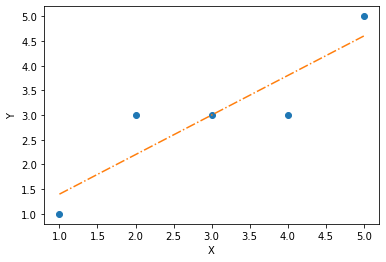

In [27]:
coef = np.polyfit(x, y_o, 1)
y_est = np.poly1d(coef)
print("Alpha: %.2f, Beta: %.2f" % (coef[1], coef[0]))

plt.plot(x, y_o, 'o')
plt.plot(x, y_est(x), '-.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()